In [147]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [149]:
data = pd.read_csv("iris.csv")

In [151]:
df = copy.deepcopy(data)
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [153]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [157]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [159]:
df.shape

(150, 5)

In [161]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [165]:
df.set_index('species',inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2


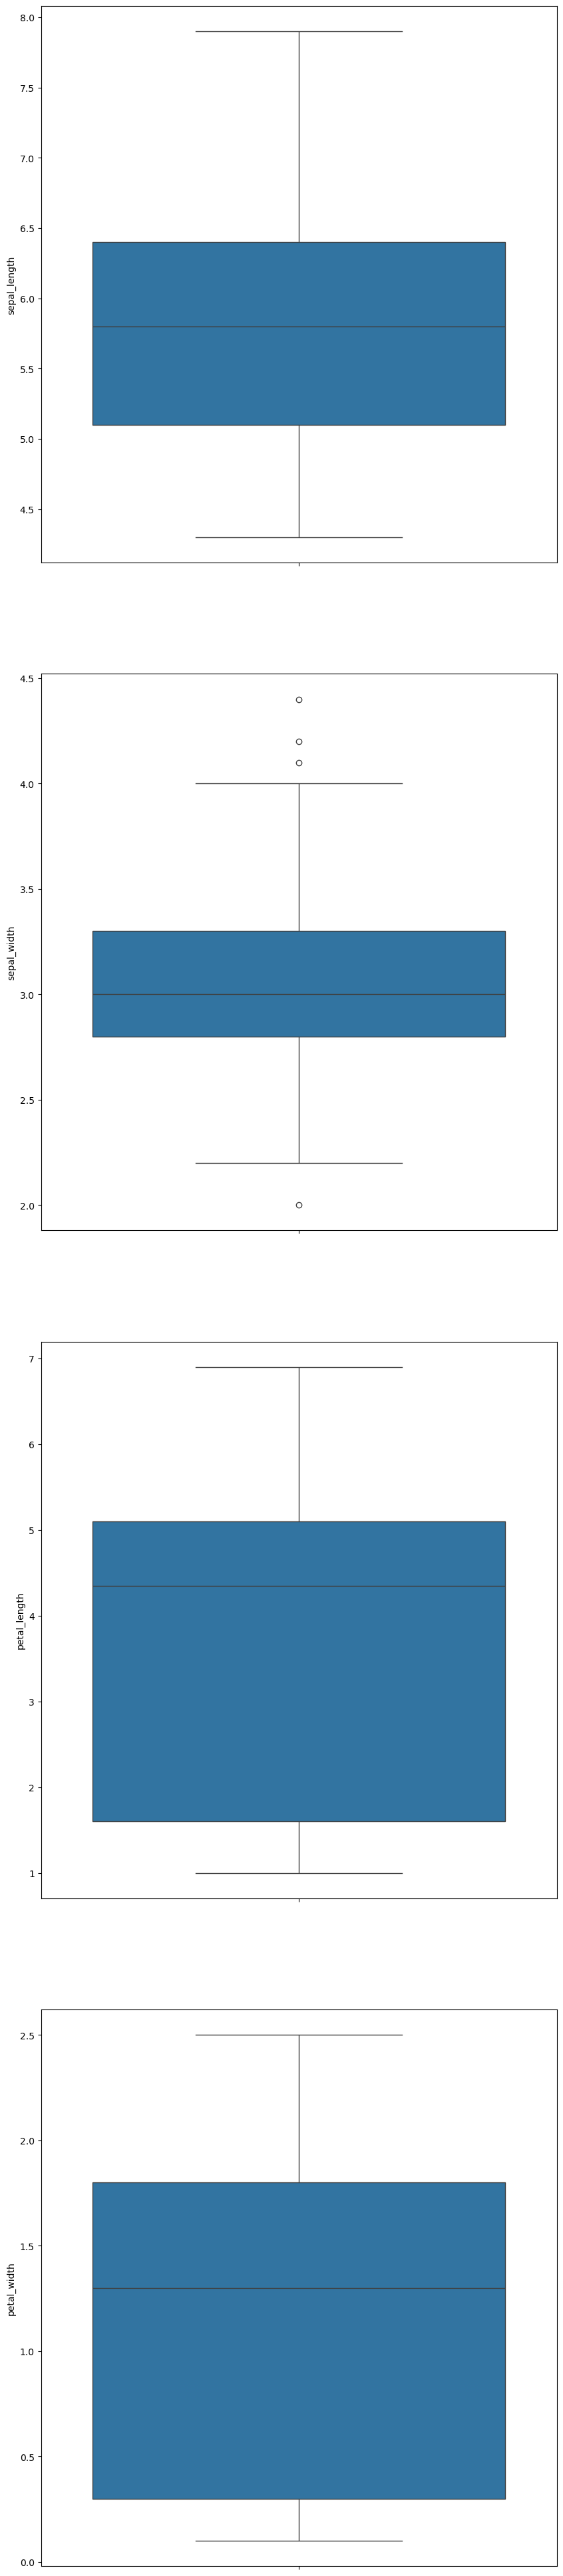

In [167]:
fig, axes = plt.subplots(nrows=len(df.columns),figsize=(10,50))
for i in range(len(df.columns)):
   sns.boxplot(ax=axes[i],y=df.columns[i],data=df)

In [168]:
def boxplot_clip(col):
    q1 = df.loc[:,col].quantile(0.25)
    q3 = df.loc[:,col].quantile(0.75)
    iqr = q3 - q1
    upperbound = q3 + 1.5 * iqr
    lowerbound = q1 - 1.5 * iqr
    df[col] = df[col].clip(lowerbound,upperbound)

In [169]:
for i in df.columns:
    boxplot_clip(i)

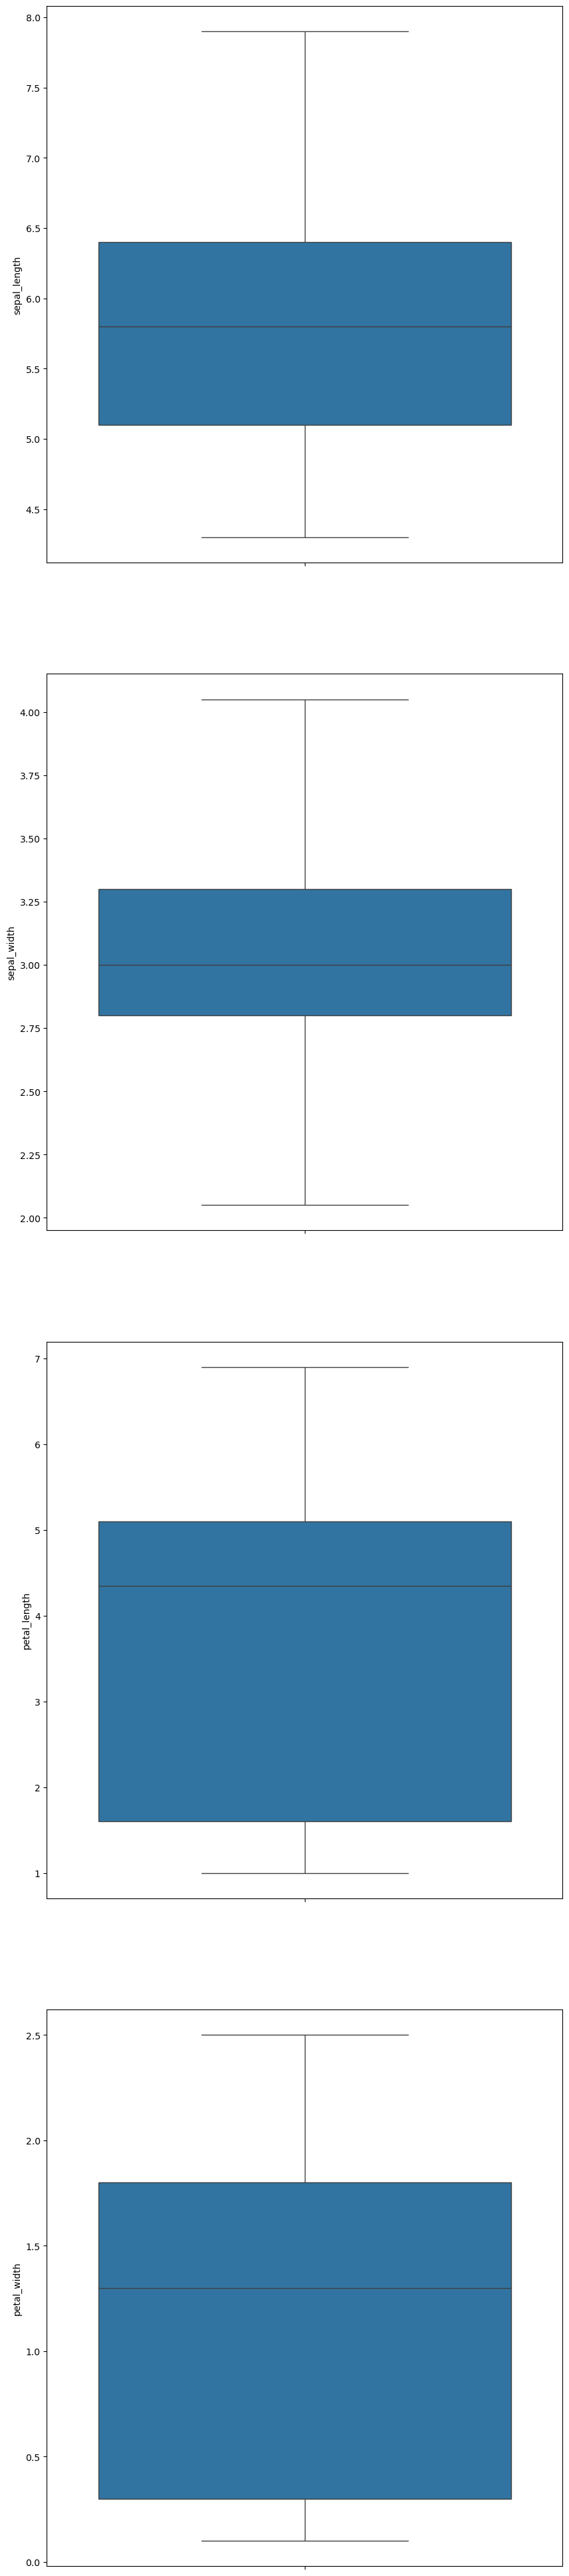

In [173]:
fig, axes = plt.subplots(nrows=len(df.columns),figsize=(10,50))
for i in range(len(df.columns)):
   sns.boxplot(ax=axes[i],y=df.columns[i],data=df)

In [174]:
#Scaling

In [176]:
column_names = df.columns
index_names = data.species
s = StandardScaler()
df = s.fit_transform(df)
df = pd.DataFrame(df, index = index_names, columns = column_names)

In [179]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977
setosa,-1.143017,-0.120170,-1.341272,-1.312977
setosa,-1.385353,0.354187,-1.398138,-1.312977
setosa,-1.506521,0.117008,-1.284407,-1.312977
setosa,-1.021849,1.302901,-1.341272,-1.312977


In [181]:
#K-Means

In [183]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(df)

KMeans(n_clusters=3, random_state=42)

In [185]:
k_means.labels_

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [187]:
df_final = copy.deepcopy(df)
df_final.head()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977
setosa,-1.143017,-0.120170,-1.341272,-1.312977
setosa,-1.385353,0.354187,-1.398138,-1.312977
setosa,-1.506521,0.117008,-1.284407,-1.312977
setosa,-1.021849,1.302901,-1.341272,-1.312977


In [189]:
df_final['k_means_cluster'] = k_means.labels_

In [191]:
df_final.head(60)             
#virginica - 0
#setosa- 1
#versicolor-2

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster
species,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,1
setosa,-1.143017,-0.120170,-1.341272,-1.312977,2
setosa,-1.385353,0.354187,-1.398138,-1.312977,2
setosa,-1.506521,0.117008,-1.284407,-1.312977,2
setosa,-1.021849,1.302901,-1.341272,-1.312977,1
setosa,-0.537178,2.014436,-1.170675,-1.050031,1
setosa,-1.506521,0.828544,-1.341272,-1.181504,1
setosa,-1.021849,0.828544,-1.284407,-1.312977,1
setosa,-1.748856,-0.357349,-1.341272,-1.312977,2


In [193]:
df_final.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster
species,,,,,
virginica,1.038005,0.117008,1.047087,1.579429,0
virginica,1.280340,0.117008,0.762759,1.447956,0
virginica,-0.052506,-0.831706,0.762759,0.922064,0
virginica,1.159173,0.354187,1.217684,1.447956,0
virginica,1.038005,0.591365,1.103953,1.710902,0
virginica,1.038005,-0.120170,0.819624,1.447956,0
virginica,0.553333,-1.306063,0.705893,0.922064,0
virginica,0.795669,-0.120170,0.819624,1.053537,0
virginica,0.432165,0.828544,0.933356,1.447956,0


In [195]:
df_final[df_final['k_means_cluster']==0].tail(5)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster
species,,,,,
virginica,1.038005,-0.120170,0.819624,1.447956,0
virginica,0.553333,-1.306063,0.705893,0.922064,0
virginica,0.795669,-0.120170,0.819624,1.053537,0
virginica,0.432165,0.828544,0.933356,1.447956,0
virginica,0.068662,-0.120170,0.762759,0.790591,0


In [197]:
df_final[df_final['k_means_cluster']==1].head(3)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster
species,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,1
setosa,-1.021849,1.302901,-1.341272,-1.312977,1
setosa,-0.537178,2.014436,-1.170675,-1.050031,1


In [199]:
df_final[df_final['k_means_cluster']==2].head(3)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster
species,,,,,
setosa,-1.143017,-0.120170,-1.341272,-1.312977,2
setosa,-1.385353,0.354187,-1.398138,-1.312977,2
setosa,-1.506521,0.117008,-1.284407,-1.312977,2


In [201]:
df_final.k_means_cluster.replace(to_replace={0:'virginica',
                                             1:'setosa',
                                             2:'versicolor'}, inplace = True)

In [203]:
df_final.head(60)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster
species,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,setosa
setosa,-1.143017,-0.120170,-1.341272,-1.312977,versicolor
setosa,-1.385353,0.354187,-1.398138,-1.312977,versicolor
setosa,-1.506521,0.117008,-1.284407,-1.312977,versicolor
setosa,-1.021849,1.302901,-1.341272,-1.312977,setosa
setosa,-0.537178,2.014436,-1.170675,-1.050031,setosa
setosa,-1.506521,0.828544,-1.341272,-1.181504,setosa
setosa,-1.021849,0.828544,-1.284407,-1.312977,setosa
setosa,-1.748856,-0.357349,-1.341272,-1.312977,versicolor


In [205]:
df_final.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster
species,,,,,
virginica,1.038005,-0.120170,0.819624,1.447956,virginica
virginica,0.553333,-1.306063,0.705893,0.922064,virginica
virginica,0.795669,-0.120170,0.819624,1.053537,virginica
virginica,0.432165,0.828544,0.933356,1.447956,virginica
virginica,0.068662,-0.120170,0.762759,0.790591,virginica


In [207]:
df_final.k_means_cluster.value_counts()

k_means_cluster
virginica     96
setosa        32
versicolor    22
Name: count, dtype: int64

In [209]:
# Hierarchical Agglomerative Clustering

In [211]:
ac = AgglomerativeClustering(n_clusters=3 , metric = 'euclidean', linkage ='ward')
hc_predict = ac.fit_predict(df)
hc_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int64)

In [213]:
df_final['hc_predict'] = hc_predict
df_final.head(5)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict
species,,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,setosa,1
setosa,-1.143017,-0.120170,-1.341272,-1.312977,versicolor,1
setosa,-1.385353,0.354187,-1.398138,-1.312977,versicolor,1
setosa,-1.506521,0.117008,-1.284407,-1.312977,versicolor,1
setosa,-1.021849,1.302901,-1.341272,-1.312977,setosa,1


In [215]:
df_final[df_final['hc_predict']==0].head(3)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict
species,,,,,,
setosa,-1.627688,-1.780420,-1.398138,-1.181504,versicolor,0
versicolor,-0.416010,-1.780420,0.137236,0.133226,virginica,0
versicolor,0.795669,-0.594528,0.478430,0.396172,virginica,0


In [217]:
df_final[df_final['hc_predict']==1].head(3)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict
species,,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,setosa,1
setosa,-1.143017,-0.120170,-1.341272,-1.312977,versicolor,1
setosa,-1.385353,0.354187,-1.398138,-1.312977,versicolor,1


In [219]:
df_final[df_final['hc_predict']==2].head(3)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict
species,,,,,,
versicolor,1.401508,0.354187,0.535296,0.264699,virginica,2
versicolor,0.674501,0.354187,0.421564,0.396172,virginica,2
versicolor,1.280340,0.117008,0.649027,0.396172,virginica,2


In [221]:
# 0 - versicolor
# 1 - setosa
# 2 -virginica

In [223]:
df_final.hc_predict.replace(to_replace={2:'virginica',
                                             1:'setosa',
                                             0:'versicolor'}, inplace = True)

In [225]:
df_final.head(60)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict
species,,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,setosa,setosa
setosa,-1.143017,-0.120170,-1.341272,-1.312977,versicolor,setosa
setosa,-1.385353,0.354187,-1.398138,-1.312977,versicolor,setosa
setosa,-1.506521,0.117008,-1.284407,-1.312977,versicolor,setosa
setosa,-1.021849,1.302901,-1.341272,-1.312977,setosa,setosa
setosa,-0.537178,2.014436,-1.170675,-1.050031,setosa,setosa
setosa,-1.506521,0.828544,-1.341272,-1.181504,setosa,setosa
setosa,-1.021849,0.828544,-1.284407,-1.312977,setosa,setosa
setosa,-1.748856,-0.357349,-1.341272,-1.312977,versicolor,setosa


In [227]:
df_final[df_final['k_means_cluster'] != df_final['hc_predict']]

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict
species,,,,,,
setosa,-1.143017,-0.120170,-1.341272,-1.312977,versicolor,setosa
setosa,-1.385353,0.354187,-1.398138,-1.312977,versicolor,setosa
setosa,-1.506521,0.117008,-1.284407,-1.312977,versicolor,setosa
setosa,-1.748856,-0.357349,-1.341272,-1.312977,versicolor,setosa
setosa,-1.143017,0.117008,-1.284407,-1.444450,versicolor,setosa
...,...,...,...,...,...,...
virginica,0.432165,-0.594528,0.592162,0.790591,virginica,versicolor
virginica,0.553333,-0.594528,0.762759,0.396172,virginica,versicolor
virginica,0.310998,-1.068885,1.047087,0.264699,virginica,versicolor


In [229]:
df_final[df_final['k_means_cluster'] == df_final['hc_predict']]

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict
species,,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,setosa,setosa
setosa,-1.021849,1.302901,-1.341272,-1.312977,setosa,setosa
setosa,-0.537178,2.014436,-1.170675,-1.050031,setosa,setosa
setosa,-1.506521,0.828544,-1.341272,-1.181504,setosa,setosa
setosa,-1.021849,0.828544,-1.284407,-1.312977,setosa,setosa
...,...,...,...,...,...,...
virginica,1.038005,0.591365,1.103953,1.710902,virginica,virginica
virginica,1.038005,-0.120170,0.819624,1.447956,virginica,virginica
virginica,0.795669,-0.120170,0.819624,1.053537,virginica,virginica


In [231]:
#MiniBatch


In [233]:
from sklearn.cluster import MiniBatchKMeans
mini = MiniBatchKMeans(n_clusters=3, init='k-means++', batch_size=256*4, random_state=42)
mini_cluster = mini.fit_predict(df)

In [235]:
mini_cluster

array([0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [237]:
df_final['mini_cluster'] = mini_cluster

In [239]:
df_final.head()

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict,mini_cluster
species,,,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,setosa,setosa,0
setosa,-1.143017,-0.120170,-1.341272,-1.312977,versicolor,setosa,2
setosa,-1.385353,0.354187,-1.398138,-1.312977,versicolor,setosa,2
setosa,-1.506521,0.117008,-1.284407,-1.312977,versicolor,setosa,2
setosa,-1.021849,1.302901,-1.341272,-1.312977,setosa,setosa,0


In [241]:
df_final[df_final['mini_cluster']==0].head(3)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict,mini_cluster
species,,,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,setosa,setosa,0
setosa,-1.021849,1.302901,-1.341272,-1.312977,setosa,setosa,0
setosa,-0.537178,2.014436,-1.170675,-1.050031,setosa,setosa,0


In [243]:
df_final[df_final['mini_cluster']==1].head(3)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict,mini_cluster
species,,,,,,,
versicolor,1.401508,0.354187,0.535296,0.264699,virginica,virginica,1
versicolor,0.674501,0.354187,0.421564,0.396172,virginica,virginica,1
versicolor,1.280340,0.117008,0.649027,0.396172,virginica,virginica,1


In [245]:
df_final[df_final['mini_cluster']==2].head(3)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict,mini_cluster
species,,,,,,,
setosa,-1.143017,-0.120170,-1.341272,-1.312977,versicolor,setosa,2
setosa,-1.385353,0.354187,-1.398138,-1.312977,versicolor,setosa,2
setosa,-1.506521,0.117008,-1.284407,-1.312977,versicolor,setosa,2


In [247]:
df_final.mini_cluster.replace(to_replace={2:'virginica',
                                             0:'setosa',
                                             1:'versicolor'}, inplace = True)

In [249]:
df_final.head(60)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict,mini_cluster
species,,,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,setosa,setosa,setosa
setosa,-1.143017,-0.120170,-1.341272,-1.312977,versicolor,setosa,virginica
setosa,-1.385353,0.354187,-1.398138,-1.312977,versicolor,setosa,virginica
setosa,-1.506521,0.117008,-1.284407,-1.312977,versicolor,setosa,virginica
setosa,-1.021849,1.302901,-1.341272,-1.312977,setosa,setosa,setosa
setosa,-0.537178,2.014436,-1.170675,-1.050031,setosa,setosa,setosa
setosa,-1.506521,0.828544,-1.341272,-1.181504,setosa,setosa,virginica
setosa,-1.021849,0.828544,-1.284407,-1.312977,setosa,setosa,virginica
setosa,-1.748856,-0.357349,-1.341272,-1.312977,versicolor,setosa,virginica


In [251]:
df_final[df_final['k_means_cluster'] != df_final['mini_cluster'] ]

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict,mini_cluster
species,,,,,,,
setosa,-1.143017,-0.120170,-1.341272,-1.312977,versicolor,setosa,virginica
setosa,-1.385353,0.354187,-1.398138,-1.312977,versicolor,setosa,virginica
setosa,-1.506521,0.117008,-1.284407,-1.312977,versicolor,setosa,virginica
setosa,-1.506521,0.828544,-1.341272,-1.181504,setosa,setosa,virginica
setosa,-1.021849,0.828544,-1.284407,-1.312977,setosa,setosa,virginica
...,...,...,...,...,...,...,...
virginica,1.038005,-0.120170,0.819624,1.447956,virginica,virginica,versicolor
virginica,0.553333,-1.306063,0.705893,0.922064,virginica,versicolor,versicolor
virginica,0.795669,-0.120170,0.819624,1.053537,virginica,virginica,versicolor


In [253]:
df_final[df_final['k_means_cluster'] == df_final['mini_cluster'] ]

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict,mini_cluster
species,,,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,setosa,setosa,setosa
setosa,-1.021849,1.302901,-1.341272,-1.312977,setosa,setosa,setosa
setosa,-0.537178,2.014436,-1.170675,-1.050031,setosa,setosa,setosa
setosa,-0.537178,1.540079,-1.284407,-1.312977,setosa,setosa,setosa
setosa,-0.052506,2.251615,-1.455004,-1.312977,setosa,setosa,setosa
setosa,-0.173674,2.370204,-1.284407,-1.050031,setosa,setosa,setosa
setosa,-0.537178,2.014436,-1.398138,-1.050031,setosa,setosa,setosa
setosa,-0.900681,1.065722,-1.341272,-1.181504,setosa,setosa,setosa
setosa,-0.173674,1.777258,-1.170675,-1.181504,setosa,setosa,setosa


In [255]:
#PCA

In [257]:
df_pca = df_final.drop(columns=['k_means_cluster', 'hc_predict', 'mini_cluster'],axis=1)
df_pca.head(3)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977
setosa,-1.143017,-0.120170,-1.341272,-1.312977
setosa,-1.385353,0.354187,-1.398138,-1.312977


In [259]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
after_df_pca = pca.fit_transform(df_pca)
#after_df_pca

In [261]:
k_means_pca = KMeans(n_clusters=3, random_state=42)
k_means_pca.fit(after_df_pca)


KMeans(n_clusters=3, random_state=42)

In [263]:
df_final['PCA_k_means_cluster'] = k_means_pca.labels_

In [265]:
df_final.head()

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict,mini_cluster,PCA_k_means_cluster
species,,,,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,setosa,setosa,setosa,2
setosa,-1.143017,-0.120170,-1.341272,-1.312977,versicolor,setosa,virginica,1
setosa,-1.385353,0.354187,-1.398138,-1.312977,versicolor,setosa,virginica,1
setosa,-1.506521,0.117008,-1.284407,-1.312977,versicolor,setosa,virginica,1
setosa,-1.021849,1.302901,-1.341272,-1.312977,setosa,setosa,setosa,2


In [267]:
df_final.PCA_k_means_cluster.replace(to_replace={2:'virginica',
                                             1:'setosa',
                                             0:'versicolor'}, inplace = True)

In [269]:
df_final.head(60)

,sepal_length,sepal_width,petal_length,petal_width,k_means_cluster,hc_predict,mini_cluster,PCA_k_means_cluster
species,,,,,,,,
setosa,-0.900681,1.065722,-1.341272,-1.312977,setosa,setosa,setosa,virginica
setosa,-1.143017,-0.120170,-1.341272,-1.312977,versicolor,setosa,virginica,setosa
setosa,-1.385353,0.354187,-1.398138,-1.312977,versicolor,setosa,virginica,setosa
setosa,-1.506521,0.117008,-1.284407,-1.312977,versicolor,setosa,virginica,setosa
setosa,-1.021849,1.302901,-1.341272,-1.312977,setosa,setosa,setosa,virginica
setosa,-0.537178,2.014436,-1.170675,-1.050031,setosa,setosa,setosa,virginica
setosa,-1.506521,0.828544,-1.341272,-1.181504,setosa,setosa,virginica,virginica
setosa,-1.021849,0.828544,-1.284407,-1.312977,setosa,setosa,virginica,virginica
setosa,-1.748856,-0.357349,-1.341272,-1.312977,versicolor,setosa,virginica,setosa


In [ ]:
#FINAL